In [280]:
import numpy as np

In [281]:
nums = np.random.uniform(-10, 10, 100)

# nums = np.linspace(0,10,200)
# nums = np.concatenate((nums,np.linspace(50,100,100)))
nums = np.sort(nums)
nums

array([-9.75929459, -9.50826328, -9.49536846, -9.29078707, -9.19865007,
       -9.04914355, -8.87892581, -8.8427507 , -8.51963417, -8.51045116,
       -8.48546716, -8.04831034, -7.84056636, -7.49071988, -7.39103093,
       -7.24261334, -7.14839718, -7.05675536, -7.03676404, -6.66481302,
       -6.49274373, -6.34731881, -5.88754668, -5.83540136, -5.50971078,
       -4.58907844, -4.10292966, -3.75931019, -3.69888442, -3.41171427,
       -3.37590036, -2.94840729, -2.63259679, -2.48983434, -2.44535417,
       -1.71344347, -1.61198384, -1.40126691, -1.37625705, -1.22538156,
       -1.19837299, -1.16310852, -1.1492036 , -1.08079821, -1.04966184,
       -0.76436869, -0.5007897 , -0.49594143, -0.49260308, -0.45744038,
       -0.39247145, -0.27461318, -0.26220965, -0.21172453, -0.0489531 ,
       -0.03599439,  0.27709936,  0.49646988,  0.78113721,  0.78520022,
        1.26028842,  1.43616382,  1.46225423,  1.50961033,  1.64971941,
        1.82065304,  1.87132264,  2.71973718,  2.87927691,  3.39

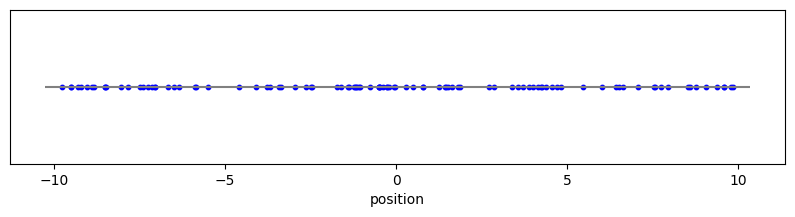

In [282]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b', s=10)

plt.xlabel('position')
plt.yticks([])
plt.show()

In [283]:
# from scipy.stats import norm
# 
# dens = []
# 
# for num in nums:
#     sum_p = 0
#     # 여기에 가우시안 넣어야 될듯
#     for num2 in nums:
#         if num != num2:
#             # gaussian 커널로 점들간 거리에 따라 확률추정
#             p = norm.pdf(num-num2, 0, 1)
#             # 점 num에서 확률추정
#             sum_p += p
# 
#     dens.append(sum_p / (len(nums)-1))
# 
# dens /= np.sum(dens)
#   
# plt.xlim([min_num-0.5, max_num+0.5])
# # plt.scatter(nums, dens, s=1)
# plt.plot(nums, dens)

## 이제 점을 옮겨야지
## 옮기려ㅈ면 기준 점에서 나머지 점들을 빼서 벡터를 만들고
## 그 벡터를 모드 더하면 어떻게든 하나의 방향이 나올거야
## 그 방향의 반대 방향으로 이동시키면

In [290]:
from scipy.stats import norm

i = 0

while i < 400:
    
    dens = []
    vec = []
    
    for num in nums:
        sum_pdf = 0
        vec_total = 0
        # 여기에 가우시안 넣어야 될듯
        for num2 in nums:
            if num != num2:
                # gaussian 커널로 점들간 거리에 따라 확률추정
                # 이게 벡터의 크기
                p = norm.pdf(num-num2, 0, 1)
                # 점 num에서 확률추정
                sum_pdf += p
                vec_total += p * (num-num2)
                
        dens.append(sum_pdf / (len(nums)-1))
        vec.append(vec_total)
    
    dens /= np.sum(dens)
    nums += vec
    i += 1

## 지금 dens랑 num이랑 sort할 때 똑같이 해줘야됨

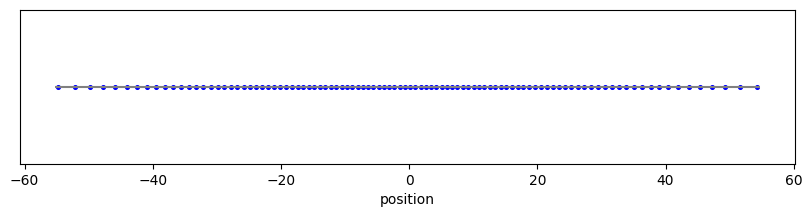

In [291]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b', s=7)

plt.xlabel('position')
plt.yticks([])
plt.show()

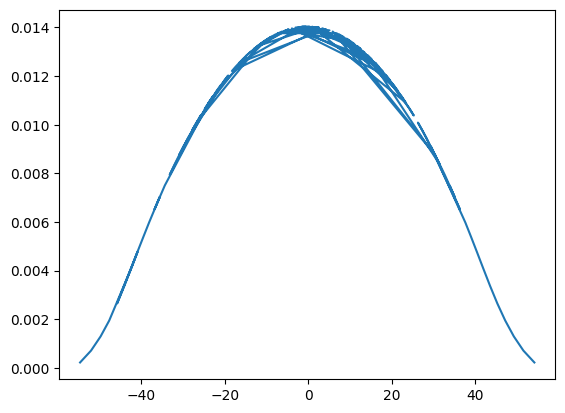

In [298]:
plt.xlim([min_num-5, max_num+5])
# plt.scatter(nums, dens, s=1)
plt.plot(nums, dens)
# plt.scatter(nums, dens, color='b', s=7)